In [ ]:
#nbi:hide_in
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
import numpy
import nbinteract as nbi
import seaborn as sns
import scipy

# Gaussian Distribution

Gaussian Distributions are a powerful tool for statistical and Machine Learning tasks. They are used in fitting regression models, clustering and much more.
A gaussian distribution in a random variable X with mean μ and variance σ is a continuous statistic distribution on domain x∊(-∞,+∞) with probability density function given by the below equation. It is a bell curved shape probability distribution.

##### $$p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma}} \exp\left\{ -\frac{(x-\mu)^2}{\sigma^2}\right\}$$

### Visualisation of Gaussian Distribution

The following widget visualises Gaussian Distribution in Single Variable

In [2]:
#nbi:hide_in
def single_g(Mu, Sigma):
    
    x = numpy.linspace(-2.5, 12.5, 100)
    rv = multivariate_normal(Mu, Sigma)
    Z = rv.pdf(x)
    
    fig = plt.figure(figsize=(12,12))
    
    ax1 = fig.add_subplot(111)
    ax1.plot(x, Z)
    fig.show()
    ax1.set_title("Normal Distribution")
    ax1.set_xticks([])
    ax1.set_yticks([])
single_g = interact(single_g, Mu=(0,10), Sigma=(0.1,15,0.1));

interactive(children=(IntSlider(value=5, description='Mu', max=10), FloatSlider(value=7.5, description='Sigma'…

Many things closely follow a Normal Distribution:
1. Heights of people
2. Error in Measurement
### & Marks on a test!

## Fitting a single Gaussian

Let us generate some data

In [3]:
#nbi:hide_in
def pdf_func_1(x_array, amp, mean, sigma):
    return amp*(1/(sigma*(numpy.sqrt(2*numpy.pi))))*(numpy.exp(-((x_array-mean)**2)/((2*sigma)**2)))


In [4]:
#nbi:hide_in
def generate_marks(Mean=75,Sigma=15, Noise=5):
    # linearly spaced x-axis of 10 values between 1 and 10
    x_array = numpy.linspace(1,100,50)

    amp1 = 2000
    y_array_gauss = pdf_func_1(x_array, amp1, Mean, Sigma)
    # creating some noise to add the the y-axis data
    y_noise_gauss = numpy.random.normal(0,Noise,50)
    y_array_gauss += y_noise_gauss
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
    ax1.set_ylim(0,150)
    ax1.set_title("Marks in ML")
    ax1.scatter(x_array, y_array_gauss)
    
y_ = interact(generate_marks, Mean=(50,90), Sigma=(1,25,1), Noise=(1,10));

interactive(children=(IntSlider(value=75, description='Mean', max=90, min=50), IntSlider(value=15, description…

In [22]:
#nbi:hide_in

def fit_marks_1(Mean=75,Sigma=15, Noise=5):
# linearly spaced x-axis of 10 values between 1 and 10
    x_array = numpy.linspace(1,100,50)

    amp1 = 2000
    y_array_gauss = pdf_func_1(x_array, amp1, Mean, Sigma)
    # creating some noise to add the the y-axis data
    y_noise_gauss = numpy.random.normal(0,Noise,50)
    y_array_gauss += y_noise_gauss
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
    ax1.set_ylim(0,150)
    ax1.set_title("Marks in ML")
    ax1.scatter(x_array, y_array_gauss)

    popt_gauss, pcov_gauss = scipy.optimize.curve_fit(pdf_func_1, x_array, y_array_gauss, p0=[amp1, Mean, Sigma])
    gen_norm = pdf_func_1(x_array, popt_gauss[0], popt_gauss[1],popt_gauss[2])
    ax1.plot(x_array,gen_norm)
    

gen_marks = interact(fit_marks_1, Mean=(50,90), Sigma=(1,25,1), Noise=(1,10));

interactive(children=(IntSlider(value=75, description='Mean', max=90, min=50), IntSlider(value=15, description…

## Fitting a two Gaussian Variables

In [7]:
#nbi:hide_in
def pdf_func_2(x_array, amp1, mean1, sigma1, amp2, mean2, sigma2):
    return amp1*(1/(sigma1*(numpy.sqrt(2*numpy.pi))))*(numpy.exp(-((x_array-mean1)**2)/((2*sigma1)**2))) + amp2*(1/(sigma2*(numpy.sqrt(2*numpy.pi))))*(numpy.exp(-((x_array-mean2)**2)/((2*sigma2)**2)))

In [24]:
#nbi:hide_in
def fit_marks_1(Mean1=75,Sigma1=15,Mean2=75,Sigma2=15,Noise=5):
# linearly spaced x-axis of 10 values between 1 and 10
    x_array = numpy.linspace(1,100,50)

    amp1 = 1000
    amp2 = 1000
    y_array_gauss = pdf_func_2(x_array, amp1, Mean1, Sigma1, amp2, Mean2, Sigma2)
    # creating some noise to add the the y-axis data
    y_noise_gauss = numpy.random.normal(0,Noise,50)
    y_array_gauss += y_noise_gauss
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
    ax1.set_ylim(0,150)
    ax1.set_title("Marks in ML + Marks in DataScience")

    popt_gauss, pcov_gauss = scipy.optimize.curve_fit(pdf_func_2, x_array, y_array_gauss, p0=[amp1, Mean1, Sigma1,amp2, Mean2, Sigma2])
#     pars_1 = popt_2gauss[0:3]
#     pars_2 = popt_2gauss[3:6]
#     gauss_peak_1 = _1gaussian(x_array, *pars_1)
#     gauss_peak_2 = _1gaussian(x_array, *pars_2)
    gen_norm1 = pdf_func_1(x_array, popt_gauss[0], popt_gauss[1],popt_gauss[2])
    gen_norm2 = pdf_func_1(x_array, popt_gauss[3], popt_gauss[4],popt_gauss[5])
    ax1.plot(x_array, gen_norm1)
    ax1.plot(x_array,gen_norm2)
    ax1.scatter(x_array, y_array_gauss)
    
gen_marks_2 = interact(fit_marks_1, Mean1=(50,90), Sigma1=(1,10,1),Mean2=(50,90), Sigma2=(1,10,1), Noise=(1,10));

interactive(children=(IntSlider(value=75, description='Mean1', max=90, min=50), IntSlider(value=10, descriptio…

# Importance of Gaussian Distribution

### Central Limit Theorem

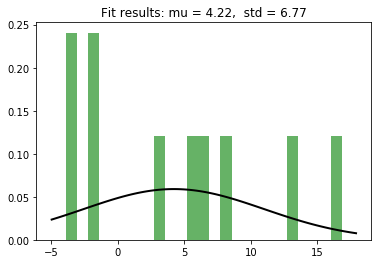

In [12]:
def lawlargeNumbers(mean,sigma,samples):
    # Generate some data for this demonstration.
    data = norm.rvs(mean, sigma, size=samples)

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = numpy.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.show()

lawlargeNumbers(5,10,10)

## Multivariate Gaussian Variables

The probability distribution function for multivariate gaussian distribution in given by the bellow expression. Here μ is a vector of means of normal distribution in every dimension and Σ is the covariance matrix

$$p(x \mid \mu, \Sigma) = (2\pi)^{-k/2}|\Sigma|^{-1/2} \exp\left\{ -\frac{1}{2} (x-\mu)^{\prime}\Sigma^{-1}(x-\mu) \right\}$$

### Visualisation of Gaussian Distribution in 2 variables

In [ ]:
#nbi:hide_in
def f(Mean1,Mean2,Cov11=1,Cov12=0,Cov21=0,Cov22=1):
    
    try: 
        Cov11=float(Cov11)
        Cov12=float(Cov12)
        Cov21=float(Cov21)
        Cov22=float(Cov22)
    except:
        print("Invalid Covariance Values")
        return
    
    x = numpy.linspace(0, 10, 100)
    y = numpy.linspace(0, 10, 100)
    X, Y = numpy.meshgrid(x, y)
    pos = numpy.dstack((X, Y))
    mu = numpy.array([Mean1,Mean2])
    try:
        cov = numpy.array([[Cov11, Cov12],[Cov21, Cov22]])
        rv = multivariate_normal(mu, cov)
        Z = rv.pdf(pos)
    except:
        print("Invalid Covariance Matrix: Not a positive semi-definite Matrix\nPlease try other values")
        return
    
    fig = plt.figure(figsize=(15,8))
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='RdPu')
    ax2 = fig.add_subplot(122)
    ax2.contourf(X,Y,Z,levels=25,cmap='RdPu')
    
    ax1.set_title("Probability Distribution Function")
    ax2.set_title("Contour Plot")
    
    ax2.set_axis_off()
    ax1.set_axis_off()
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_zticks([])

t = interact(f, Mean1=(0,10),Mean2=(0,10), Cov11='5',Cov12='0',Cov21='0',Cov22='5');

## Gaussian Process Fitting

In [ ]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

In [ ]:
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [ ]:
x = numpy.array([-5, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4, 
-3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3, -2.9, 
-2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8, 
-1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, 
-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 
0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 
1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 
3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 
4.5, 4.6, 4.7, 4.8, 4.9, 5])
 
y = numpy.array([1.04442478194401, 0.948306088493654, 0.357037759697332, 0.492336514646604, 
0.520651364364746, 0.112629866592809, 0.470995468454158, -0.168442254267804, 
0.0720344402575861, -0.188108980535916, -0.0160163306512027, 
-0.0388792158617705, -0.0600673630622568, 0.113568725264636, 
0.447160403837629, 0.664421188556779, -0.139510743820276, 0.458823971660986, 
0.141214654640904, -0.286957663528091, -0.466537724021695, -0.308185884317105, 
-1.57664872694079, -1.44463024170082, -1.51206214603847, -1.49393593601901, 
-2.02292464164487, -1.57047488853653, -1.22973445533419, -1.51502367058357, 
-1.41493587255224, -1.10140254663611, -0.591866485375275, -1.08781838696462, 
-0.800375653733931, -1.00764767602679, -0.0471028950122742, -0.536820626879737, 
-0.151688056391446, -0.176771681318393, -0.240094952335518, -1.16827876746502, 
-0.493597351974992, -0.831683011472805, -0.152347043914137, 0.0190364158178343, 
-1.09355955218051, -0.328157917911376, -0.585575679802941, -0.472837120425201, 
-0.503633622750049, -0.0124446353828312, -0.465529814250314, 
-0.101621725887347, -0.26988462590405, 0.398726664193302, 0.113805181040188, 
0.331353802465398, 0.383592361618461, 0.431647298655434, 0.580036473774238, 
0.830404669466897, 1.17919105883462, 0.871037583886711, 1.12290553424174, 
0.752564860804382, 0.76897960270623, 1.14738839410786, 0.773151715269892, 
0.700611498974798, 0.0412951045437818, 0.303526087747629, -0.139399513324585, 
-0.862987735433697, -1.23399179134008, -1.58924289116396, -1.35105117911049, 
-0.990144529089174, -1.91175364127672, -1.31836236129543, -1.65955735224704, 
-1.83516148300526, -2.03817062501248, -1.66764011409214, -0.552154350554687, 
-0.547807883952654, -0.905389222477036, -0.737156477425302, -0.40211249920415, 
0.129669958952991, 0.271142753510592, 0.176311762529962, 0.283580281859344, 
0.635808289696458, 1.69976647982837, 1.10748978734239, 0.365412229181044, 
0.788821368082444, 0.879731888124867, 1.02180766619069, 0.551526067300283])

In [ ]:
X = x.reshape(-1, 1)
X.shape

In [ ]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, y)

In [ ]:
x_pred = numpy.linspace(-6, 6).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

In [ ]:
gp.get_params()

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(numpy.concatenate([x_pred, x_pred[::-1]]),
         numpy.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(-6, 6)
plt.ylim(-3, 3)
plt.legend(loc='lower left');